<a href="https://colab.research.google.com/github/aysua/NN_LinearRegression/blob/master/Multivariable_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
#My input and output sets
my_input2=np.array([[0,0],[0,1],[1,0],[1,1]])
my_output2=np.array([[0],[0],[0],[1]])
my_input=np.array([[4.168263,	4.00815,	4.184075,	3.82005,	4.026175,	4.13055,	-1.03678,	-0.05051,	0.00945	],[3.094213,	3.9568,	4.737988,	4.110263,	3.9967,	3.272588,	-0.8894,	0.040193,	0.033658],[3.06915,	3.97195,	4.737963,	4.112288,	3.9867,	3.263313, -0.8932,	0.271485,	0.085156],[2.974425,	3.752725,	4.307638,	4.10785,	3.796013,	2.968713,	-1.93477,	0.140581,	0.13266],[2.620388,	3.687063,	4.738813,	3.533275,	3.8771,	3.16435,	-3.46142,	0.812443,	-0.02836]])
my_output=np.array([[1265],[1215.34],[1153.31],[1155.29],[1145.249]])
print(my_input[:][0])

[ 4.168263  4.00815   4.184075  3.82005   4.026175  4.13055  -1.03678
 -0.05051   0.00945 ]


In [0]:
#All methods and initialization

def init():
  example_number=my_input.shape[0]
  feature_number=my_input.shape[1]

  z=np.array(np.zeros(example_number))
  weights=np.random.rand(1,feature_number)
  g_weights=weights.shape
  bias=0;
  g_bias=0;#np.zeros(shape=(example_number,1))
  lr=0.005;
  loss=0.01;
  return z, weights, g_weights, bias, g_bias, lr, loss, example_number, feature_number


def feedforward(x,bias,z,weights):
  z=np.dot(x,np.transpose(weights))+bias
  return z

def backprop(example_number,x,y,z,weights, g_weights,lr,bias,g_bias,feature_number):
  
  g_weights=(1/example_number)*np.dot(np.transpose(z-y),x)
  g_bias=(1/example_number)*np.sum((z-y))
  weights=weights-lr*g_weights
  #print('weights:',weights)
  #print('g_weights',g_weights)
  bias=bias-lr*g_bias
  return weights, g_weights, bias, g_bias

def lossfunction(loss, example_number,z,y):
  loss=1/(2*example_number)*(np.power(np.sum(z-y),2))
  return loss

def predict(weights,x,bias):
  result=np.dot(x,np.transpose(weights))+bias
  return result


In [112]:
#Dummy variables
iteration=5000;
loss_array=[]

#Train phase
z, weights, g_weights, bias, g_bias, lr, loss,example_number,feature_number=init()

while(iteration>=0):
  z=feedforward(my_input,bias,z,weights)
  loss=lossfunction(loss, example_number,z,my_output)
  weights, g_weights, bias, g_bias=backprop(example_number,my_input,my_output,z,weights, g_weights,lr,bias,g_bias,feature_number)
  iteration-=1
  if(iteration%1000):
    loss_array.append(loss)

print(weights,bias)
print(loss)

[[ 59.22237259  47.11572797  42.62813975  55.4838048   49.84908412
   47.52809776 -26.61947072 -38.1384344   -3.65235998]] 13.350438464072592
0.0005692340701030036


[[1265.87072317]
 [1189.84047556]
 [1179.33391356]
 [1153.84260161]
 [1145.22587889]]
0.0005692340701030036


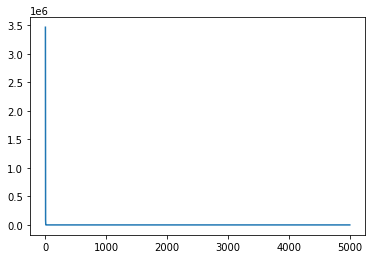

In [113]:
#Prediction
my_test_array=np.array([[1,1]])

result=predict(weights,my_input,bias)
print(result)
plt.plot(loss_array)
print(loss)
